Fashion Class Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
sns.set()
import tensorflow as tf

In [2]:
data_train = pd.read_csv('D:/Courses/Machine Learning Practical/Fashion Class Classification/P39-Fashion-MNIST-Datasets/fashion-mnist_train.csv', sep = ',')

In [3]:
data_test = pd.read_csv('D:/Courses/Machine Learning Practical/Fashion Class Classification/P39-Fashion-MNIST-Datasets/fashion-mnist_test.csv', sep = ',')

In [4]:
train = np.array(data_train, dtype = 'float32')
test = np.array(data_test, dtype = 'float32')

Visualization

6.0

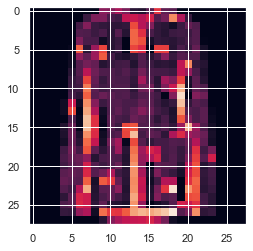

In [5]:
import random
i = random.randint(1,60000)
plt.imshow(train[i, 1:].reshape(28,28))
label = train[i,0]
label

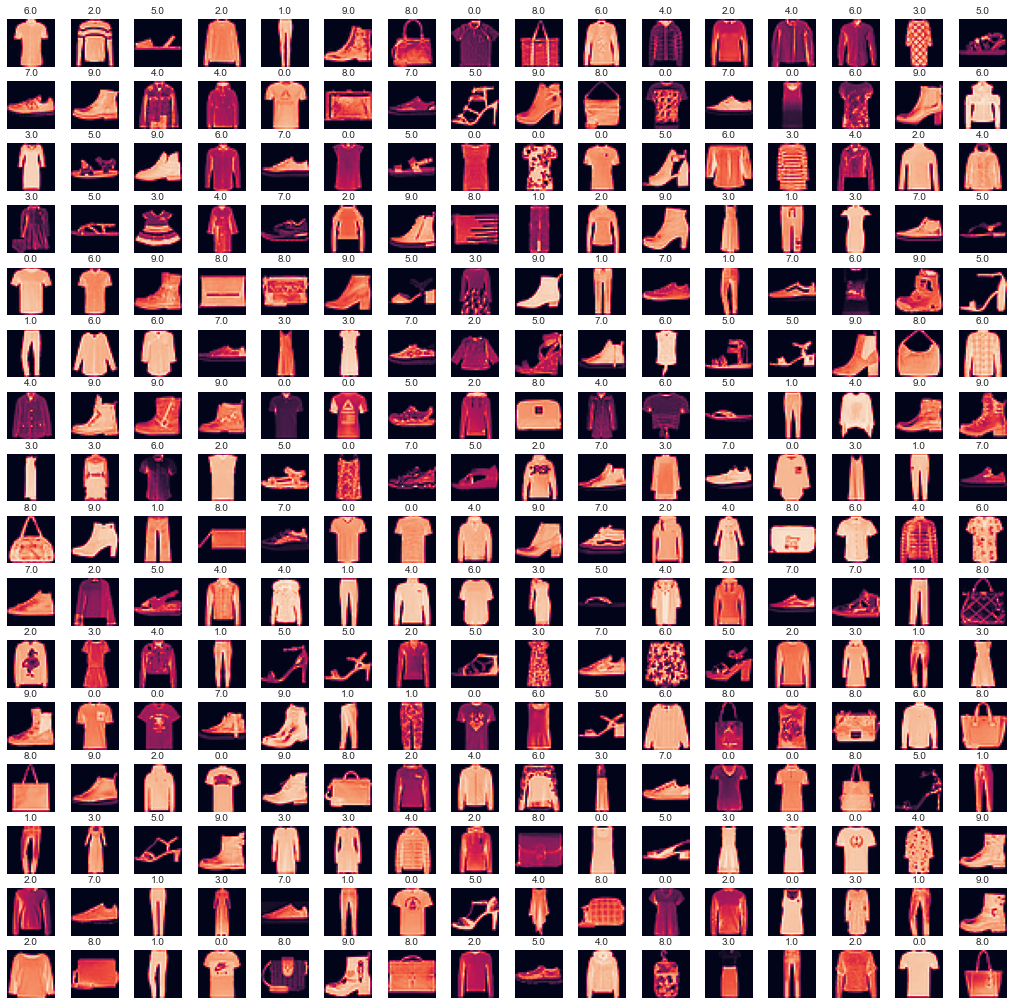

In [6]:
width = 16
length = 16

fig, axes = plt.subplots(length, width, figsize = (18,18))

axes = axes.ravel()

tr_len = len(train)


for i in np.arange(0,length*width):
    index = np.random.randint(0, tr_len)
    axes[i].imshow(train[index, 1:].reshape(28,28))
    axes[i].set_title(train[index, 0], fontsize = 10)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.3)

Model training

In [7]:
inputs_train = train[:,1:]/255
target_train = train[:, 0]

In [8]:
inputs_test = test[:,1:]/255
target_test = test[:, 0]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
 inputs_train, inputs_val, target_train, target_val = train_test_split(
                                     inputs_train, target_train, test_size=0.1, random_state=432)

In [11]:
inputs_train = inputs_train.reshape(inputs_train.shape[0], *(28,28,1))
inputs_val = inputs_val.reshape(inputs_val.shape[0], *(28,28,1))
inputs_test = inputs_test.reshape(inputs_test.shape[0], *(28,28,1))

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(64,3,3, input_shape = (28,28,1), activation = 'relu'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [17]:
model.add(Flatten())

In [48]:
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
#model.add(Dense(60, activation = 'relu'))

In [49]:
model.add(Dense(10, activation = 'sigmoid'))

In [50]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

In [52]:
num_epochs = 50
model.fit(inputs_train,target_train,batch_size =850, epochs=num_epochs,callbacks = [early_stopping], validation_data=(inputs_val, target_val), verbose =2)

Epoch 1/50
64/64 - 3s - loss: 2.1631 - accuracy: 0.3907 - val_loss: 1.9433 - val_accuracy: 0.5295
Epoch 2/50
64/64 - 3s - loss: 1.5206 - accuracy: 0.4851 - val_loss: 1.0656 - val_accuracy: 0.5175
Epoch 3/50
64/64 - 3s - loss: 0.9178 - accuracy: 0.5638 - val_loss: 0.8187 - val_accuracy: 0.7023
Epoch 4/50
64/64 - 3s - loss: 0.6665 - accuracy: 0.7384 - val_loss: 0.6091 - val_accuracy: 0.7492
Epoch 5/50
64/64 - 3s - loss: 0.4562 - accuracy: 0.8711 - val_loss: 0.4370 - val_accuracy: 0.8703
Epoch 6/50
64/64 - 3s - loss: 0.3575 - accuracy: 0.8866 - val_loss: 0.3923 - val_accuracy: 0.8723
Epoch 7/50
64/64 - 3s - loss: 0.3311 - accuracy: 0.8927 - val_loss: 0.3866 - val_accuracy: 0.8755
Epoch 8/50
64/64 - 3s - loss: 0.3246 - accuracy: 0.8914 - val_loss: 0.3701 - val_accuracy: 0.8812
Epoch 9/50
64/64 - 3s - loss: 0.3137 - accuracy: 0.8933 - val_loss: 0.3790 - val_accuracy: 0.8717
Epoch 10/50
64/64 - 3s - loss: 0.3084 - accuracy: 0.8950 - val_loss: 0.3625 - val_accuracy: 0.8783
Epoch 11/50
64/64 -

Evaluation

In [53]:
test_loss, test_acc = model.evaluate(inputs_test, target_test)

313/313 [==============================] - 0s 833us/step - loss: 0.3265 - accuracy: 0.8886


In [54]:
print('\nTest loss : {0:.2f}. \nTest Accuracy : {1:.2f}%'.format(test_loss, test_acc*100))


Test loss : 0.33. 
Test Accuracy : 88.86%


In [55]:
pred_classes = model.predict_classes(inputs_test)
pred_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

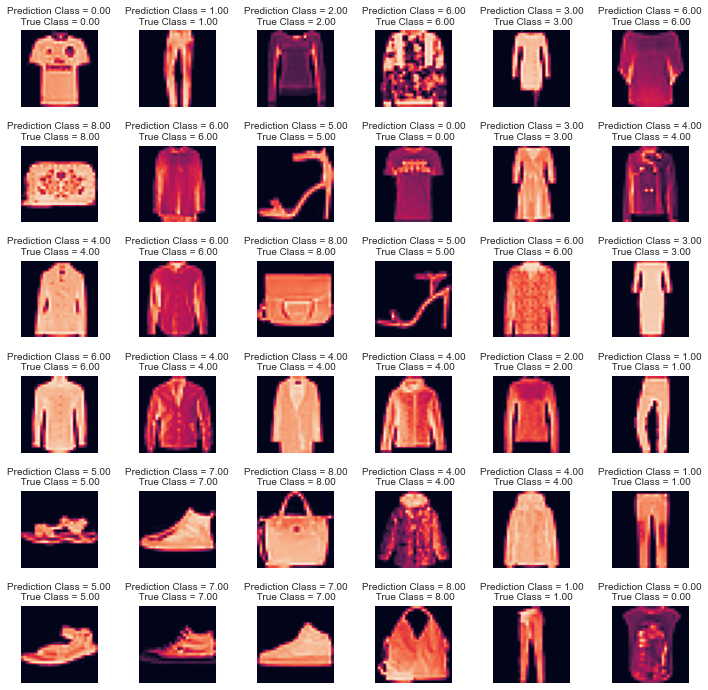

In [56]:
width = 6
length = 6

fig, axes = plt.subplots(length, width, figsize = (12,12))

axes = axes.ravel()

tr_len = len(train)


for i in np.arange(0,length*width):
    axes[i].imshow(inputs_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class = {0:.2f}\n True Class = {0:.2f}'.format(pred_classes[i], target_test[i]), fontsize = 10)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

<AxesSubplot:>

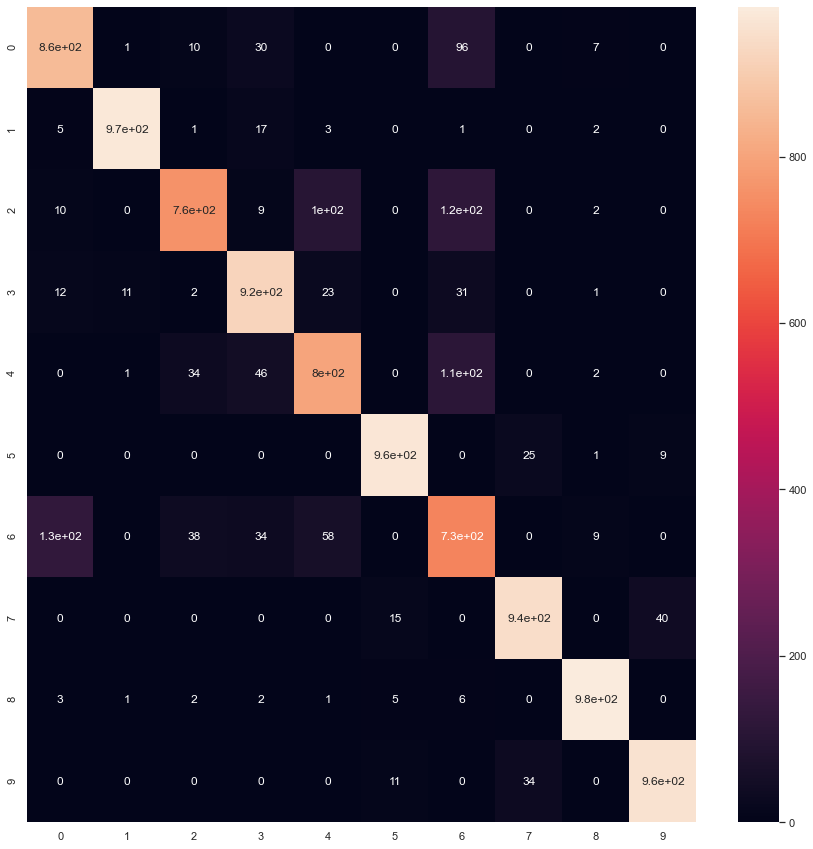

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, pred_classes)
plt.figure(figsize = (15,15))
sns.heatmap (cm, annot=True)

In [58]:
from sklearn.metrics import classification_report

In [59]:
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(target_test, pred_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.86      0.85      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.90      0.76      0.82      1000
     Class 3       0.87      0.92      0.89      1000
     Class 4       0.81      0.80      0.81      1000
     Class 5       0.97      0.96      0.97      1000
     Class 6       0.67      0.73      0.70      1000
     Class 7       0.94      0.94      0.94      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

